<a href="https://colab.research.google.com/github/PabloJRW/clustering/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Clustering
## Density-Based Spatial Clustering of Applications with Noise

* Basado en densidad
* Su principio se basa en que un cluster tiene alta densidad mientras que la región que los separa no la tiene.
* La idea principal es uqe cada punto e el cluster, de acuerdo a un radio dado debe tener un mínimo de vecinos o puntos cercanos para encontrar densidad.
* Requiere dos parámetros:
  * Eps(Epsilon)
  *MinPts(Mínimo de puntos)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# Generación de datos aleatoria de 500 muestras
# 4 clusters
from numpy.random.mtrand import rand
X, y, c = make_blobs(
    n_samples=500, 
    cluster_std=0.8, 
    centers=4, 
    n_features=2, 
    return_centers=True,
    random_state=23
    )

# Conversión de los datos a un dataframe
df_blobs = pd.DataFrame(
    {
        'x1': X[:, 0],
        'x2': X[:, 1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1]
    }
)

In [3]:
# Generación de datos aleatoria con forma de luna
X_m, y_m = make_moons(
    n_samples=250,
    noise=0.05, 
    random_state=24
)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:, 0],
        'x2': X_m[:, 1]
    }
)

## Visualización de los datos

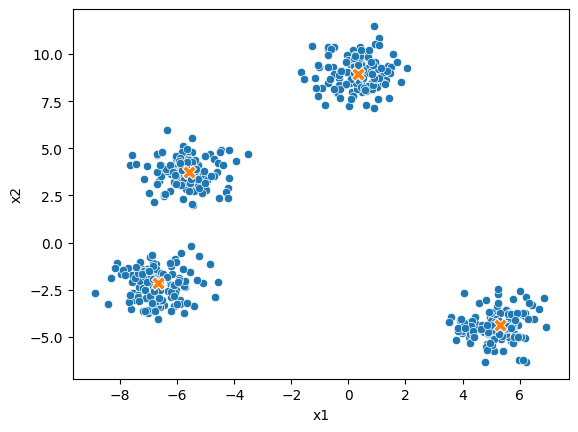

In [4]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.show()

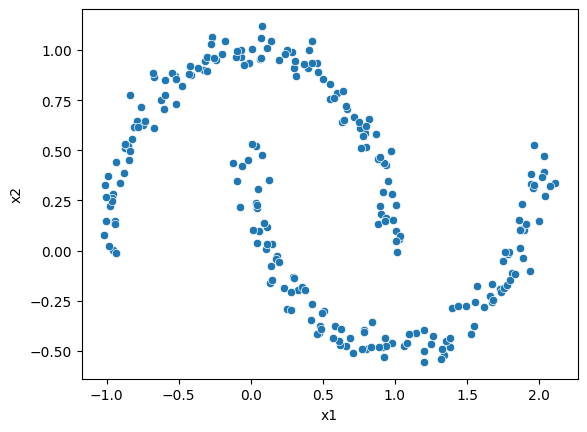

In [5]:
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

 ## Implementando DBSCAN

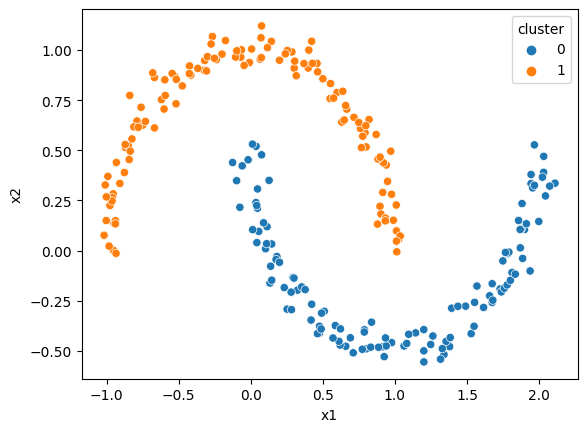

In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
y_m_preds = dbscan.fit_predict(X_m)
df_moons['cluster'] = y_m_preds

sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

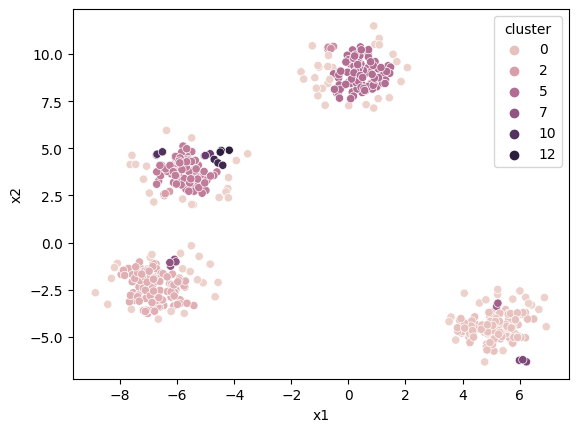

In [7]:
dbscan2 = DBSCAN(eps=0.3, min_samples=3)
y_preds = dbscan2.fit_predict(X)
df_blobs['cluster'] = y_preds

sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show()

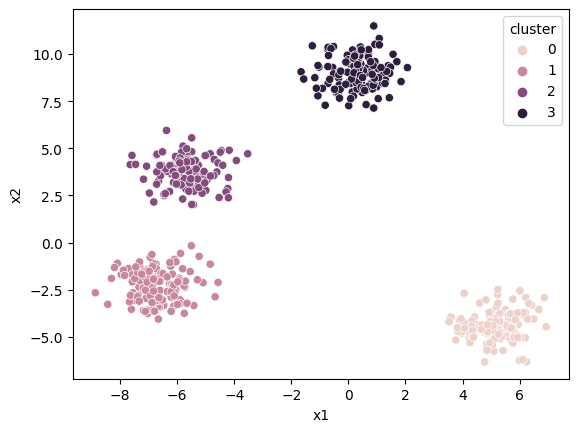

In [8]:
dbscan2 = DBSCAN(eps=1, min_samples=3)
y_preds = dbscan2.fit_predict(X)
df_blobs['cluster'] = y_preds

sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show()

### Hiperparámetros

Para calcular el hiperparámetro epsilon se utiliza el modelo NearestNeighbors. Mediante este podemos conocer la distancia de un punto con respecto al resto (número de vecinos indicados), que posteriormente gráficados nos da una pista del rango de distancia promedio entre puntos. 

In [9]:
from sklearn.neighbors import NearestNeighbors

El número de vecinos que se suele utilizar, es el número de variables de X multiplicado por 2. 

In [10]:

nn = NearestNeighbors(n_neighbors=3)
nn_fitted = nn.fit(X)
distances, indices = nn_fitted.kneighbors(X)

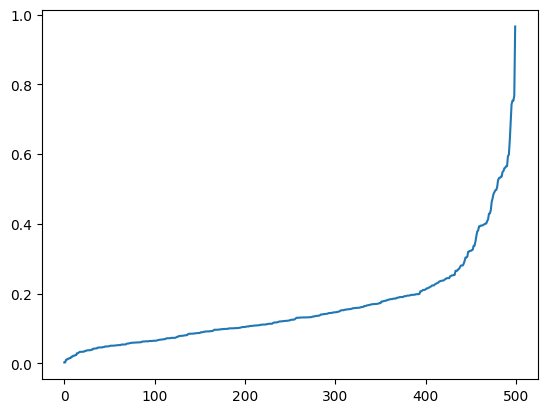

In [11]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.plot(distances)
plt.show()

In [14]:
eps_values = np.arange(0.2, 0.8, 0.05)
min_samples = np.arange(2, 10)

In [15]:
from itertools import product

# Crea una lista con todas las combinaciones de eps y min_samples
dbscan_params = list(product(eps_values, min_samples)) 
sil_scores = []

for p in dbscan_params:
  y_preds = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
  sil_scores.append(silhouette_score(X, y_preds))

In [16]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=["Eps", "Min_Samples"])
df_params_tunning["sil_scores"] = sil_scores

pivot_data = pd.pivot_table(df_params_tunning, values='sil_scores', index='Min_Samples', columns='Eps')
pivot_data

Eps,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80
Min_Samples,,,,,,,,,,,,,
2,0.081460,-0.018822,-0.017955,0.059163,0.078813,0.211789,0.287732,0.406792,0.562385,0.675438,0.669091,0.646665,0.719159
3,-0.031926,-0.043067,0.040855,0.106465,0.146236,0.268031,0.321756,0.406792,0.670657,0.675438,0.669091,0.646665,0.719159
4,-0.134619,0.001351,0.175507,0.194661,0.252595,0.434255,0.482931,0.502226,0.767139,0.775016,0.776296,0.782642,0.785681
5,-0.360252,-0.102442,0.329230,0.290803,0.248434,0.511375,0.561342,0.600472,0.763145,0.770805,0.776195,0.781671,0.788147
6,-0.487642,-0.239662,0.181921,0.464536,0.515034,0.475684,0.637069,0.676729,0.741651,0.769900,0.775641,0.780847,0.788147
7,-0.605945,-0.370996,0.014994,0.445153,0.476950,0.453412,0.503751,0.660508,0.707111,0.754894,0.769900,0.778261,0.788928
8,-0.548269,-0.477845,-0.200198,0.079245,0.444471,0.527538,0.587038,0.657954,0.694429,0.737965,0.761867,0.772580,0.784831
9,-0.323964,-0.552006,-0.284694,0.128153,0.410427,0.505843,0.575058,0.639503,0.676304,0.722481,0.761867,0.766003,0.783447


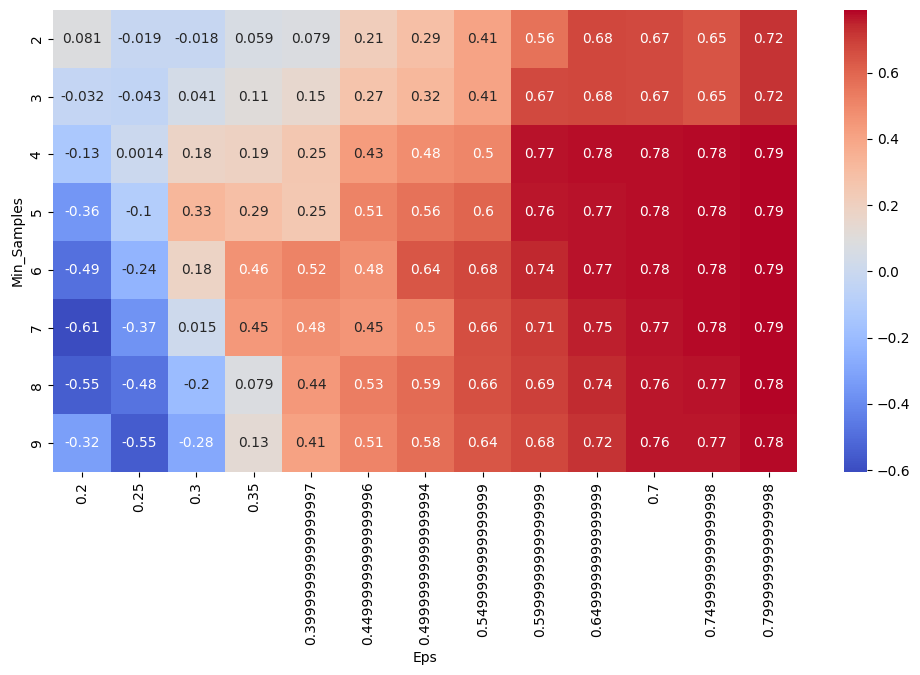

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm')
plt.show()

## Evaluación

In [20]:
model = DBSCAN(eps=0.7999, min_samples=7)
y_preds = model.fit_predict(X)
df_blobs['cluster'] = y_preds

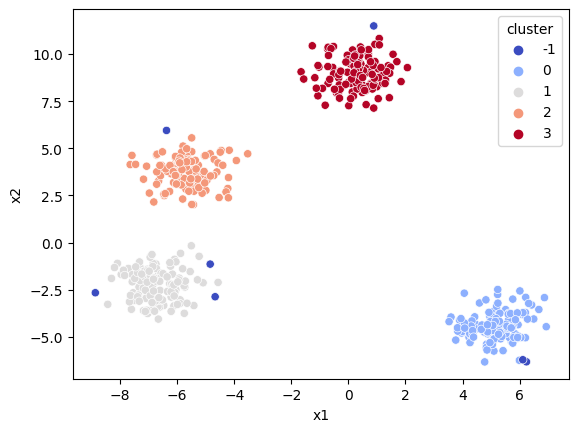

In [21]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
plt.show()

In [ ]:
silhouette_score(X, y_preds)